In [16]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip freeze --local > /content/gdrive/My\ Drive/colab_installed.txt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Important PIP instols**

In [17]:
!pip3 install --upgrade Keras
import csv
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Requirement already up-to-date: Keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


**Extracting texts from .text files and lableing** 

In [18]:
import sklearn
from sklearn import datasets
from pprint import pprint 

random_state1 = 100
docs_to_train = sklearn.datasets.load_files("/content/gdrive/My Drive/9_class_Without title_Data_Document_Summary_Label_Davit_Hrach_No_Topic", description=None, categories=None,
                                            load_content=True, shuffle=True, 
                                            encoding='utf-8', decode_error='strict', random_state=random_state1)
# print(docs_to_train)

# print(list(docs_to_train.data))

# print(docs_to_train)

# for i in range(2):
#   print(docs_to_train.data[i], docs_to_train.target[i])

# print((docs_to_train.data))
# print(docs_to_train.target)
# print(docs_to_train.target_names)

c = dict(docs_to_train)
sentences=c['data']
label=c['target']
labels=np.array(label)
#print(labels)
print(len(labels))
#print(c)
len(label)


432


432

**Hyperparameters**

In [5]:
vocab_size = 8228
embedding_dim = 120
max_length = 500
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_and_test_cross_val_portion = 0.9
remove=75
random_state1=100
vocab_size_1 = 7897

**Split data into train_validation (train data validation data) and test data**

In [6]:
train_and_cross_val_Test_size = int(len(sentences) * training_and_test_cross_val_portion)

train_cross_val = sentences[:train_and_cross_val_Test_size]
train_labels_cross_val = labels[:train_and_cross_val_Test_size]

control_test_sentences = sentences[train_and_cross_val_Test_size:]
control_test_labels = labels[train_and_cross_val_Test_size:]
print((control_test_labels))


print(len(train_cross_val))
print(len(train_labels_cross_val))
print(len(control_test_sentences))


[5 3 5 6 4 1 2 8 1 0 2 4 5 2 8 8 7 3 8 1 1 2 8 1 6 7 4 2 8 4 6 0 4 1 1 7 7
 8 1 7 7 6 5 0]
388
388
44


**Getting unwanted words from our obtained vocabulary**

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

print(tokenizer.index_word)
print(len(tokenizer.index_word))
n = remove
first_n_words = []

for i in range(n):
  first_n_words.append(tokenizer.index_word[i+1])

print(first_n_words)

import pickle

# saving

with open("/content/gdrive/My Drive/token_porc_nwords/tokenizer_first_n_words.pickle", 'wb') as handle:

    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

{1: '<OOV>', 2: 'of', 3: 'the', 4: 'and', 5: 'in', 6: 'to', 7: 'with', 8: 'a', 9: 'or', 10: 'be', 11: 'patients', 12: 'is', 13: 'for', 14: '1', 15: '2', 16: 'mg', 17: 'should', 18: 'may', 19: '5', 20: '0', 21: '3', 22: 'not', 23: 'dose', 24: 'as', 25: '4', 26: 'are', 27: '6', 28: 'by', 29: 'drug', 30: 'on', 31: 'been', 32: 'treatment', 33: 'at', 34: 'was', 35: 'adverse', 36: 'use', 37: 'have', 38: 'an', 39: 'day', 40: 'see', 41: 'clinical', 42: 'reactions', 43: 'other', 44: '7', 45: 'were', 46: 'therapy', 47: 'that', 48: 'increased', 49: '8', 50: 'women', 51: 'has', 52: 'placebo', 53: 'risk', 54: '10', 55: 'administration', 56: 'from', 57: 'reported', 58: 'these', 59: 'years', 60: 'pageul', 61: 'estrogen', 62: 'than', 63: 'when', 64: '9', 65: 'tablets', 66: '12', 67: 'no', 68: 'studies', 69: 'during', 70: 'doses', 71: 'symptoms', 72: 'e', 73: 'topiramate', 74: 'effects', 75: 'estrogens', 76: 'respiratory', 77: 'if', 78: 'following', 79: 'used', 80: 'daily', 81: 'n', 82: 'system', 83: '

**General stop words**

In [8]:
# stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
#              "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", 
#              "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
#              "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", 
#              "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", 
#              "other",  "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", 
#              "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", 
#              "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", 
#              "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", 
#              "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", 
#              "yours", "yourself", "yourselves" ]
stopwords=[]
# stopwords=["adverse", "reactions","clinical", "pharmacology","contraindications",
#            "description","dosage" "and" "administration","how" "supplied","storage","handling","indications", "usage","overdosage",
#            "warnings", "precautions"]


**Combined unwanted words**

In [9]:
unwanted_words = stopwords+first_n_words
print(len(stopwords))
print(unwanted_words)
print(len(unwanted_words))

0
['<OOV>', 'of', 'the', 'and', 'in', 'to', 'with', 'a', 'or', 'be', 'patients', 'is', 'for', '1', '2', 'mg', 'should', 'may', '5', '0', '3', 'not', 'dose', 'as', '4', 'are', '6', 'by', 'drug', 'on', 'been', 'treatment', 'at', 'was', 'adverse', 'use', 'have', 'an', 'day', 'see', 'clinical', 'reactions', 'other', '7', 'were', 'therapy', 'that', 'increased', '8', 'women', 'has', 'placebo', 'risk', '10', 'administration', 'from', 'reported', 'these', 'years', 'pageul', 'estrogen', 'than', 'when', '9', 'tablets', '12', 'no', 'studies', 'during', 'doses', 'symptoms', 'e', 'topiramate', 'effects', 'estrogens']
75


**Function wich remoove words from list of words**

In [10]:
def remove_words(words):
    """Remove words from list of words"""
    new_words = []
    for word in words:
        if word not in unwanted_words:
            new_words.append(word)
    return new_words

**Function wich filter sentences**

In [11]:
def filtered(sentenc):
  filtered_sentences = []
  for sent in sentenc:
   lis = tf.keras.preprocessing.text.text_to_word_sequence(sent, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
   lis = remove_words(lis)
   filtered_sentence = (" ").join(lis)
   filtered_sentences.append(filtered_sentence)
  return filtered_sentences


**Continuing data preprocessing (padding of filtered sentences)**

In [12]:
train_cross_val_fil=filtered(train_cross_val)


tokenizer1 = Tokenizer(num_words = 7897, oov_token=oov_tok)
tokenizer1.fit_on_texts(train_cross_val_fil)

print(tokenizer1.index_word)
print(len(tokenizer1.index_word))

train_cross_val_seq = tokenizer1.texts_to_sequences(train_cross_val_fil)

train_cross_val_padded= pad_sequences(train_cross_val_seq, padding=padding_type, maxlen=max_length)
train_labels_cross_val_seq=np.expand_dims(train_labels_cross_val, axis=1)

print(train_cross_val_seq[1])
print(len(train_cross_val_seq[1]))

import pickle

# saving

with open("/content/gdrive/My Drive/token_porc_test/tokenizer_for_test.pickle", 'wb') as hand:

    pickle.dump(tokenizer1, hand, protocol=pickle.HIGHEST_PROTOCOL)


{1: '<OOV>', 2: 'if', 3: 'respiratory', 4: 'system', 5: 'daily', 6: 'following', 7: 'n', 8: 'gemzar', 9: 'after', 10: 'used', 11: 'patient', 12: 'disorders', 13: 'more', 14: 'administered', 15: 'who', 16: 'cancer', 17: 'controlled', 18: 'dosage', 19: 'one', 20: 'depression', 21: 'this', 22: 'severe', 23: 'can', 24: 'such', 25: 'receiving', 26: 'trials', 27: 'renal', 28: 'opioid', 29: 'treated', 30: '25', 31: 'it', 32: 'study', 33: 'associated', 34: 'also', 35: 'ml', 36: 'oxycodone', 37: 'observed', 38: 'breast', 39: 'pain', 40: 'blood', 41: 'oral', 42: 'including', 43: 'increase', 44: 'age', 45: '50', 46: '100', 47: '20', 48: 'disease', 49: '11', 50: 'table', 51: 'plus', 52: 'precautions', 53: 'plasma', 54: 'effect', 55: 'incidence', 56: 'aspirin', 57: '14', 58: 'group', 59: 'pediatric', 60: 'methadone', 61: 'pregnancy', 62: 'reference', 63: 'hours', 64: 'warnings', 65: 'id', 66: 'compared', 67: '16', 68: '13', 69: 'there', 70: 'c', 71: '15', 72: 'function', 73: 'due', 74: '—', 75: 'se

In [13]:
control_test_sentences_fil=filtered(control_test_sentences )



control_test_sentences_seq = tokenizer1.texts_to_sequences(control_test_sentences_fil)

control_test_sentences_padded= pad_sequences(control_test_sentences_seq , padding=padding_type, maxlen=max_length)
control_test_labels_seq=np.expand_dims(control_test_labels,axis=1)

print(control_test_sentences_seq[8] )


[251, 218, 4, 36, 4747, 2136, 28, 517, 1097, 1431, 582, 213, 920, 1933, 36, 159, 4748, 1381, 4749, 2788, 2321, 1195, 3518, 1998, 2113, 251, 218, 4, 1093, 28, 350, 2200, 24, 4750, 4751, 36, 1592, 3, 20, 552, 1697, 210, 3, 2152, 2789, 4752, 3519, 938, 1975, 1697, 54, 1113, 4753, 56, 4754, 176, 2790, 1469, 4755, 2153, 1515, 42, 1515, 893, 1999, 1515, 77, 39, 4037, 1786, 360, 1660, 3520, 40, 4038, 3233, 119, 261, 56, 2790, 3961, 1544, 4756, 1113, 309, 299, 316, 1653, 893, 276, 356, 969, 360, 36, 1818, 1324, 748, 969, 360, 1492, 1726, 4757, 454, 1518, 4758, 932, 1574, 894, 4759, 1660, 28, 159, 4760, 965, 356, 969, 360, 1260, 2016, 2487, 4761, 1921, 2016, 1492, 428, 1366, 1492, 56, 23, 533, 276, 407, 1359, 1787, 552, 462, 3521, 1850, 2193, 177, 2425, 428, 1885, 4762, 1309, 679, 1386, 114, 2153, 1515, 2755, 4763, 679, 1386, 210, 1577, 893, 944, 2791, 1086, 1681, 172, 4, 36, 533, 285, 1669, 33, 1090, 136, 24, 483, 813, 444, 2274, 727, 301, 1519, 56, 3118, 301, 1519, 4764, 1469, 1678, 4765, 352

In [14]:
word_index = tokenizer1.word_index
index_word=tokenizer1.index_word
print(index_word)

acc_per_fold = []    # control test data accuracy
loss_per_fold = []   # control test data loss
acc_val_fold=[]      # validation data accuracy
loss_val_fold=[]     #validation data loss

{1: '<OOV>', 2: 'if', 3: 'respiratory', 4: 'system', 5: 'daily', 6: 'following', 7: 'n', 8: 'gemzar', 9: 'after', 10: 'used', 11: 'patient', 12: 'disorders', 13: 'more', 14: 'administered', 15: 'who', 16: 'cancer', 17: 'controlled', 18: 'dosage', 19: 'one', 20: 'depression', 21: 'this', 22: 'severe', 23: 'can', 24: 'such', 25: 'receiving', 26: 'trials', 27: 'renal', 28: 'opioid', 29: 'treated', 30: '25', 31: 'it', 32: 'study', 33: 'associated', 34: 'also', 35: 'ml', 36: 'oxycodone', 37: 'observed', 38: 'breast', 39: 'pain', 40: 'blood', 41: 'oral', 42: 'including', 43: 'increase', 44: 'age', 45: '50', 46: '100', 47: '20', 48: 'disease', 49: '11', 50: 'table', 51: 'plus', 52: 'precautions', 53: 'plasma', 54: 'effect', 55: 'incidence', 56: 'aspirin', 57: '14', 58: 'group', 59: 'pediatric', 60: 'methadone', 61: 'pregnancy', 62: 'reference', 63: 'hours', 64: 'warnings', 65: 'id', 66: 'compared', 67: '16', 68: '13', 69: 'there', 70: 'c', 71: '15', 72: 'function', 73: 'due', 74: '—', 75: 'se

**Model. Here we use cross validation approach and run model for each fold.**

In [14]:
from keras import regularizers as l
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import KFold
from keras.losses import sparse_categorical_crossentropy
import tensorflow as tf
es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=60, verbose=1,mode='max', restore_best_weights=True)

# Model configuration
num_epochs = 500
num_folds = 8
verbosity=1
i=0
seed = 84
np.random.seed(seed)
tf.random.set_seed(seed)
# good seed 84,83,82,80
acc_per_fold = []
loss_per_fold = []
acc_val_fold=[]
loss_val_fold=[]

Models_and_Histories={'model':{},'history':{}}

#Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_cross_val_padded , train_labels_cross_val_seq):
 
  model = tf.keras.Sequential([                          
     tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
     tf.keras.layers.Conv1D(110, 3, activation='relu'),
     tf.keras.layers.GlobalAveragePooling1D(),     
     tf.keras.layers.Dense(80,activation='relu',activity_regularizer=l.l2(0.1)), 
     tf.keras.layers.Dropout(0.5,seed=0),
     tf.keras.layers.Dense(32,activation='relu',activity_regularizer=l.l2(0.2)), 
     tf.keras.layers.Dropout(0.5,seed=1),
     tf.keras.layers.Dense(9, activation='softmax')])
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(train_cross_val_padded[train], train_labels_cross_val_seq[train], 
              epochs=num_epochs,
              verbose=verbosity,
            
              validation_data=(train_cross_val_padded[test], train_labels_cross_val_seq[test]),callbacks=[es])

  # Generate generalization metrics  
  scores_val = model.evaluate(train_cross_val_padded[test], train_labels_cross_val_seq[test], verbose=1)
  scores_test = model.evaluate(control_test_sentences_padded, control_test_labels_seq, verbose=1)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores_test[0]}; {model.metrics_names[1]} of {scores_test[1]*100}%')
  acc_per_fold.append(scores_test[1] * 100)
  loss_per_fold.append(scores_test[0])
  acc_val_fold.append(scores_val[1] * 100)
  loss_val_fold.append(scores_val[0])

  # Increase fold number
  fold_no = fold_no + 1
  Models_and_Histories['history'][i]=history
  Models_and_Histories['model'][i]=model
  i+=1


# == Provide average validation scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_val_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_val_fold[i]} - Val_Accuracy: {acc_val_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Val_ Accuracy: {np.mean(acc_val_fold)} (+- {np.std(acc_val_fold)})')
print(f'>Val_Loss: {np.mean(loss_val_fold)}')
print('------------------------------------------------------------------------')  




# == Provide average test scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Test_Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Test_Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'>Test_Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 120)          947640    
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 110)          39710     
_________________________________________________________________
global_average_pooling1d (Gl (None, 110)               0         
_________________________________________________________________
dense (Dense)                (None, 80)                8880      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2592      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [ ]:

# activation function tanh
from keras import regularizers as l
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import KFold
from keras.losses import sparse_categorical_crossentropy
import tensorflow as tf
es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=40, verbose=1,mode='max', restore_best_weights=True)

# Model configuration
num_epochs = 500
num_folds = 8
verbosity=1
i=0

np.random.seed(80)
tf.random.set_seed(80)
# good seed 84,83,82,80
acc_per_fold = []
loss_per_fold = []
acc_val_fold=[]
loss_val_fold=[]

Models_and_Histories={'model':{},'history':{}}

#Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_cross_val_padded , train_labels_cross_val_seq):
 
  model = tf.keras.Sequential([                          
     tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
     tf.keras.layers.Conv1D(110, 3, activation='relu'),
     tf.keras.layers.GlobalAveragePooling1D(),     
     tf.keras.layers.Dense(80,activation='tanh',activity_regularizer=l.l2(0.1)), 
     tf.keras.layers.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)), 
     tf.keras.layers.Dense(9, activation='softmax')])
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(train_cross_val_padded[train], train_labels_cross_val_seq[train], 
              epochs=num_epochs,
              verbose=verbosity,
            
              validation_data=(train_cross_val_padded[test], train_labels_cross_val_seq[test]),callbacks=[es])

  # Generate generalization metrics  
  scores_val = model.evaluate(train_cross_val_padded[test], train_labels_cross_val_seq[test], verbose=1)
  scores_test = model.evaluate(control_test_sentences_padded, control_test_labels_seq, verbose=1)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores_test[0]}; {model.metrics_names[1]} of {scores_test[1]*100}%')
  acc_per_fold.append(scores_test[1] * 100)
  loss_per_fold.append(scores_test[0])
  acc_val_fold.append(scores_val[1] * 100)
  loss_val_fold.append(scores_val[0])

  # Increase fold number
  fold_no = fold_no + 1
  Models_and_Histories['history'][i]=history
  Models_and_Histories['model'][i]=model
  i+=1


# == Provide average validation scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_val_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_val_fold[i]} - Val_Accuracy: {acc_val_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Val_ Accuracy: {np.mean(acc_val_fold)} (+- {np.std(acc_val_fold)})')
print(f'>Val_Loss: {np.mean(loss_val_fold)}')
print('------------------------------------------------------------------------')  




# == Provide average test scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Test_Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Test_Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'>Test_Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Model: "sequential_306"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_306 (Embedding)    (None, 500, 120)          947640    
_________________________________________________________________
conv1d_302 (Conv1D)          (None, 498, 110)          39710     
_________________________________________________________________
global_average_pooling1d_302 (None, 110)               0         
_________________________________________________________________
dense_923 (Dense)            (None, 80)                8880      
_________________________________________________________________
dense_924 (Dense)            (None, 32)                2592      
_________________________________________________________________
dense_925 (Dense)            (None, 9)                 297       
Total params: 999,119
Trainable params: 999,119
Non-trainable params: 0
______________________________________________

In [ ]:

#tuning 1 in tarberak
# #n_cols = train_inputs.shape[1]
# #input_shape = (n_cols, )
# # Creates a model given an activation and learning rate
# def create_model(learning_rate = 0.01, activation = 'relu'):
  
#     # Create an Adam optimizer with the given learning rate
#     opt = Adam(lr=learning_rate)
  
#     # Create your binary classification model  
#     model = tf.keras.Sequential([                          
#      tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
#      tf.keras.layers.Conv1D(110, 3, activation='relu'),
#      tf.keras.layers.GlobalAveragePooling1D(),     
#      tf.keras.layers.Dense(80,activation='relu',activity_regularizer=l.l2(0.1)), 
#      tf.keras.layers.Dense(32,activation='relu',activity_regularizer=l.l2(0.2)), 
#      tf.keras.layers.Dense(9, activation='softmax')])
 
# # Compile the model
#     model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  
#     return model


In [ ]:
#tuning 1 in tarberak
# import tensorflow as tf
# from keras.wrappers.scikit_learn import KerasRegressor 
# from sklearn.model_selection import RandomizedSearchCV
# from keras.optimizers import Adam 
# from sklearn.model_selection import KFold
# from keras import regularizers as l
# es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=40, verbose=1,mode='max', restore_best_weights=True)

# # Create a KerasClassifier object
# model = KerasRegressor(build_fn = create_model,
#                        verbose = 0)
# # Define the hyperparameter space
# params = {'activation': ["relu", "tanh"],
#           'batch_size': [16, 32, 64], 
#           'epochs': [50, 100],
#           'learning_rate': [0.01, 0.001, 0.0001]}
# # Create a randomize search cv object 
# random_search = RandomizedSearchCV(model,param_distributions = params, cv = KFold(8))
# random_search_results = random_search.fit(train_cross_val_padded, train_labels_cross_val_seq,callbacks=[es])

 

# #  history = model.fit(train_cross_val_padded[train], train_labels_cross_val_seq[train], 
# #               epochs=num_epochs,
# #               verbose=verbosity,
            
# #               validation_data=(train_cross_val_padded[test], train_labels_cross_val_seq[test]),callbacks=[es])

In [ ]:
#tuning 1 in tarberak
# print("Best Score: ",
#       random_search_results.best_score_,
#       "and Best Params: ",
#       random_search_results.best_params_)

Best Score:  -0.6154294386506081 and Best Params:  {'learning_rate': 0.001, 'epochs': 100, 'batch_size': 16, 'activation': 'tanh'}


In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=3d720095371f96142abf6bbe1ab48139e38d5e25b8dbc0f0ce6daeb7c0b7f6fe
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=1920d5224c3dcf440f671c17f2bb30c8db9d7414524f33f2b506a5c8a6579154
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import keras
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length)
  model.add(keras.layers.Conv1D(110, 3, activation='relu')),
  # model.add(layers.Dense(units=hp.Int('units',min_value=32,max_value=64,step=32),activation='relu'))
  
  #  model.add(layers.Dense(9, activation='softmax'))
  #  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
  #       loss='sparse_categorical_crossentropy',
  #       metrics=['accuracy'])
  #   return model
    
    
    # model.compile(
    #     optimizer=keras.optimizers.Adam(
    #         hp.Choice('learning_rate',
    #                   values=[1e-2, 1e-3, 1e-4])),
    #     loss='sparse_categorical_crossentropy',
    #     metrics=['accuracy'])
    # return model


#   model = tf.keras.Sequential([                          
#      tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
#      tf.keras.layers.Conv1D(110, 3, activation='relu'),
#      tf.keras.layers.GlobalAveragePooling1D(),  
        
#      keras.layers.Dense(units=hp.Int('units',
#                                         min_value=32,
#                                         max_value=512,
#                                         step=32),
#                            activation='relu',activity_regularizer=l.l2(0.1)), 
#      keras.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)), 
#      keras.Dense(9, activation='softmax')])
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    
    # model = keras.Sequential()
    # model.add(layers.Dense(units=hp.Int('units',
    #                                     min_value=32,
    #                                     max_value=512,
    #                                     step=32),
    #                        activation='relu'))
    # model.add(layers.Dense(10, activation='softmax'))
    # model.compile(
    #     optimizer=keras.optimizers.Adam(
    #         hp.Choice('learning_rate',
    #                   values=[1e-2, 1e-3, 1e-4])),
    #     loss='sparse_categorical_crossentropy',
    #     metrics=['accuracy'])
    # return model



# model = tf.keras.Sequential([                          
#      tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
#      tf.keras.layers.Conv1D(110, 3, activation='relu'),
#      tf.keras.layers.GlobalAveragePooling1D(),     
#      tf.keras.layers.Dense(80,activation='tanh',activity_regularizer=l.l2(0.1)), 
#      tf.keras.layers.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)), 
#      tf.keras.layers.Dense(9, activation='softmax')])
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  


In [ ]:
import kerastuner
import numpy as np
from sklearn import model_selection
class CVTuner(kerastuner.engine.tuner.Tuner):
  def run_trial(self, trial, x, y, batch_size=32, epochs=1):
    cv = model_selection.KFold(8)
    val_losses = []
    for train_indices, test_indices in cv.split(x):
      x_train, x_test = x[train_indices], x[test_indices]
      y_train, y_test = y[train_indices], y[test_indices]
      model = self.hypermodel.build(trial.hyperparameters)
      model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
      val_losses.append(model.evaluate(x_test, y_test))
    self.oracle.update_trial(trial.trial_id, {'val_loss': np.mean(val_losses)})
    self.save_model(trial.trial_id, model)
tuner = CVTuner(hypermodel=build_model,oracle=kerastuner.oracles.BayesianOptimization(objective='val_loss', max_trials=40))
x, y = train_cross_val_padded , train_labels_cross_val_seq # NumPy data
tuner.search(x, y, batch_size=64, epochs=30)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-55-0b38853fa6b3>", line 15, in build_model
    keras.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)),
AttributeError: module 'keras' has no attribute 'Dense'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-55-0b38853fa6b3>", line 15, in build_model
    keras.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)),
AttributeError: module 'keras' has no attribute 'Dense'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-55-0b38853fa6b3>", line 15, in build_model
    keras.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)),
AttributeError: module 'keras' has no attribute 'Dense'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-55-0b38853fa6b3>", line 15, in build_model
    keras.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)),
AttributeError: module 'keras' has no attribute 'Dense'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-55-0b38853fa6b3>", line 15, in build_model
    keras.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)),
AttributeError: module 'keras' has no attribute 'Dense'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-55-0b38853fa6b3>", line 15, in build_model
    keras.Dense(32,activation='tanh',activity_regularizer=l.l2(0.2)),
AttributeError: module 'keras' has no attribute 'Dense'


RuntimeError: ignored

In [ ]:
train_labels_cross_val_seq[4]

array([0])

In [ ]:

# կիրառենք հանրահայտ .Bidirectional(tf.keras.layers.LSTM(64)) model ը
from keras import regularizers as l
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import KFold
from keras.losses import sparse_categorical_crossentropy
import tensorflow as tf
es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1,mode='max', restore_best_weights=True)

# Model configuration
num_epochs = 150
num_folds = 8
verbosity=1
i=0

acc_per_fold = []
loss_per_fold = []
acc_val_fold=[]
loss_val_fold=[]

Models_and_Histories={'model':{},'history':{}}

#Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_cross_val_padded , train_labels_cross_val_seq):

  # model = tf.keras.Sequential([                          
  #    tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
     
  #    tf.keras.layers.Conv1D(110, 3, activation='relu'),
  #    tf.keras.layers.GlobalAveragePooling1D(),     
  #    tf.keras.layers.Dense(80,activation='relu',activity_regularizer=l.l2(0.1)), 
  #    tf.keras.layers.Dense(32,activation='relu',activity_regularizer=l.l2(0.2)), 
  #    tf.keras.layers.Dense(9, activation='softmax')])
  # model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  #model.summary()



# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size_1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(94)),     
    tf.keras.layers.Dense(35, activation='relu',activity_regularizer=l.l2(0.2)),
    tf.keras.layers.Dense(35, activation='relu',activity_regularizer=l.l2(0.2)),
    tf.keras.layers.Dense(9, activation= 'softmax')])
    
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(train_cross_val_padded[train], train_labels_cross_val_seq[train], 
              epochs=num_epochs,
              verbose=verbosity,
            
              validation_data=(train_cross_val_padded[test], train_labels_cross_val_seq[test]),callbacks=[es])

  # Generate generalization metrics  
  scores_val = model.evaluate(train_cross_val_padded[test], train_labels_cross_val_seq[test], verbose=1)
  scores_test = model.evaluate(control_test_sentences_padded, control_test_labels_seq, verbose=1)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores_test[0]}; {model.metrics_names[1]} of {scores_test[1]*100}%')
  acc_per_fold.append(scores_test[1] * 100)
  loss_per_fold.append(scores_test[0])
  acc_val_fold.append(scores_val[1] * 100)
  loss_val_fold.append(scores_val[0])

  # Increase fold number
  fold_no = fold_no + 1
  Models_and_Histories['history'][i]=history
  Models_and_Histories['model'][i]=model
  i+=1


# == Provide average validation scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_val_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_val_fold[i]} - Val_Accuracy: {acc_val_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Val_ Accuracy: {np.mean(acc_val_fold)} (+- {np.std(acc_val_fold)})')
print(f'>Val_Loss: {np.mean(loss_val_fold)}')
print('------------------------------------------------------------------------')  




# == Provide average test scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Test_Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'>Test_Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'>Test_Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:LOOCV.gif  Vizualization cross validation 

https://i.stack.imgur.com/8uEci.png

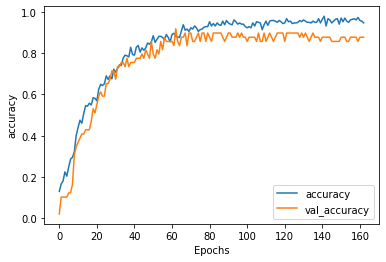

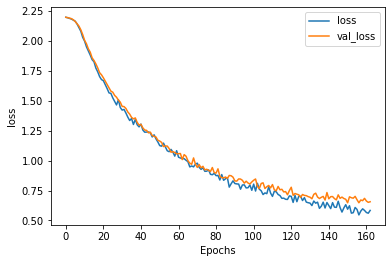

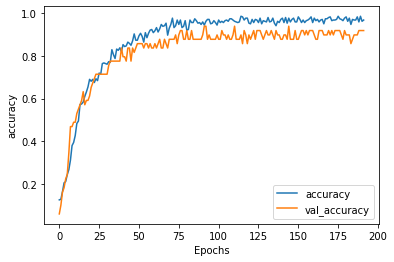

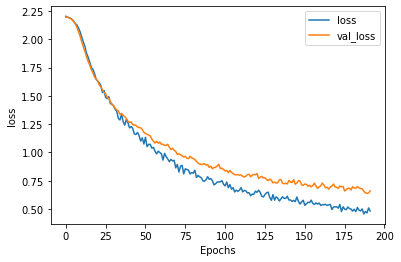

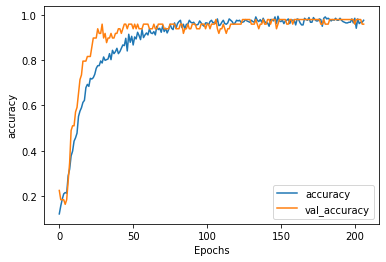

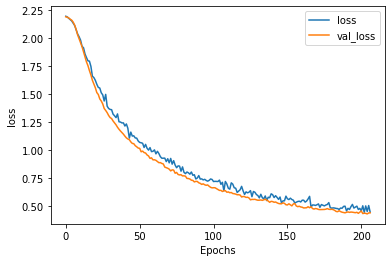

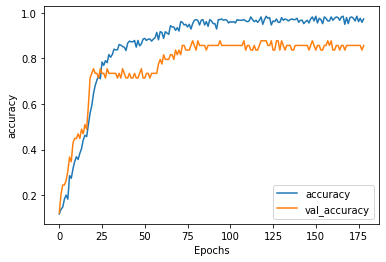

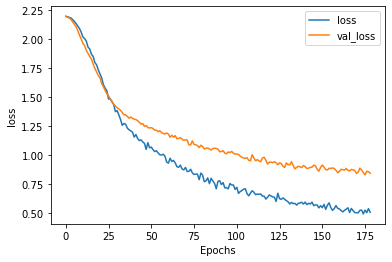

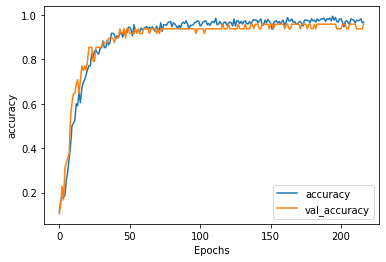

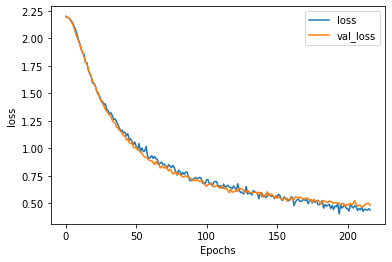

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(Models_and_Histories['history'][0], "accuracy")
plot_graphs(Models_and_Histories['history'][0], "loss")

plot_graphs(Models_and_Histories['history'][1], "accuracy")
plot_graphs(Models_and_Histories['history'][1], "loss")

  
plot_graphs(Models_and_Histories['history'][2], "accuracy")
plot_graphs(Models_and_Histories['history'][2], "loss")

plot_graphs(Models_and_Histories['history'][3], "accuracy")
plot_graphs(Models_and_Histories['history'][3], "loss")

plot_graphs(Models_and_Histories['history'][4], "accuracy")
plot_graphs(Models_and_Histories['history'][4], "loss")


In [ ]:
# layer=model.layers[2]
# weight=layer.get_weights()
# a=layer.get_config()
# layer.set_weights(weight)



**Save Models**

In [15]:
# Save the model
Models_and_Histories['model'][0].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold1.h5')
Models_and_Histories['model'][1].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold2.h5')
Models_and_Histories['model'][2].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold3.h5')
Models_and_Histories['model'][3].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold4.h5')
Models_and_Histories['model'][4].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold5.h5')
Models_and_Histories['model'][5].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold6.h5')
Models_and_Histories['model'][6].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold7.h5')
Models_and_Histories['model'][7].save('/content/gdrive/My Drive/8_fold_save9494/my_model_fold8.h5')


In [ ]:
Models_and_Histories['model'][4]

**Load Models**

In [19]:
# Recreate the exact same model purely from the file

new_model1 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold1.h5')
new_model2 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold2.h5')
new_model3 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold3.h5')
new_model4 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold4.h5')
new_model5 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold5.h5')
new_model6 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold6.h5')
new_model7 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold7.h5')
new_model8 = tf.keras.models.load_model('/content/gdrive/My Drive/8_fold_save9494/my_model_fold8.h5')

In [ ]:

y_probas=[]

y_probas=np.average(y_probas, axis=0)


In [107]:
from scipy.stats import rankdata

y1 = new_model1.predict(control_test_sentences_padded)
y2 = new_model2.predict(control_test_sentences_padded)
y3 = new_model3.predict(control_test_sentences_padded)
y4 = new_model4.predict(control_test_sentences_padded)
y5 = new_model5.predict(control_test_sentences_padded)
y6 = new_model6.predict(control_test_sentences_padded)
y7 = new_model7.predict(control_test_sentences_padded)
y8 = new_model8.predict(control_test_sentences_padded)
y = [y1,y2,y3,y4,y5,y6,y7,y8]


a=[]


y=np.average(y, axis=0)


for i in range(len(y)):
  a.append(np.argmax(y[i]))



        
        



3
[[5]
 [3]
 [5]
 [6]
 [4]
 [1]
 [2]
 [8]
 [1]
 [0]
 [2]
 [4]
 [5]
 [2]
 [8]
 [8]
 [7]
 [3]
 [8]
 [1]
 [1]
 [2]
 [8]
 [1]
 [6]
 [7]
 [4]
 [2]
 [8]
 [4]
 [6]
 [0]
 [4]
 [1]
 [1]
 [7]
 [7]
 [8]
 [1]
 [7]
 [7]
 [6]
 [5]
 [0]]


[5,
 3,
 5,
 6,
 4,
 1,
 2,
 0,
 1,
 0,
 2,
 4,
 5,
 2,
 8,
 8,
 7,
 3,
 8,
 1,
 1,
 2,
 8,
 1,
 6,
 6,
 4,
 2,
 8,
 4,
 6,
 0,
 4,
 1,
 1,
 7,
 7,
 8,
 1,
 7,
 7,
 6,
 5,
 0]

In [ ]:
# (new_model.weights[0])

In [ ]:
# print(new_model1.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
# print(new_model2.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
# print(new_model3.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
# print(new_model4.evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))
# print()
print(Models_and_Histories['model'][7].evaluate(control_test_sentences_padded,control_test_labels_seq, batch_size=32))

In [ ]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#   word = index_word[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [ ]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

**Confusion Matrix for Model1**

In [108]:
#y_pred=Models_and_Histories['model'][4].predict_classes(control_test_sentences_padded)
#y_pred=new_model2.predict_classes(control_test_sentences_padded)

con_mat = tf.math.confusion_matrix(labels=control_test_labels_seq, predictions=a).numpy()

print(con_mat)

print()

print((control_test_labels))
#print(y_pred)                                      #aij-should be i, but model predicts j (i,j=0;1...)



[[3 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 1 5 0]
 [1 0 0 0 0 0 0 0 6]]

[5 3 5 6 4 1 2 8 1 0 2 4 5 2 8 8 7 3 8 1 1 2 8 1 6 7 4 2 8 4 6 0 4 1 1 7 7
 8 1 7 7 6 5 0]


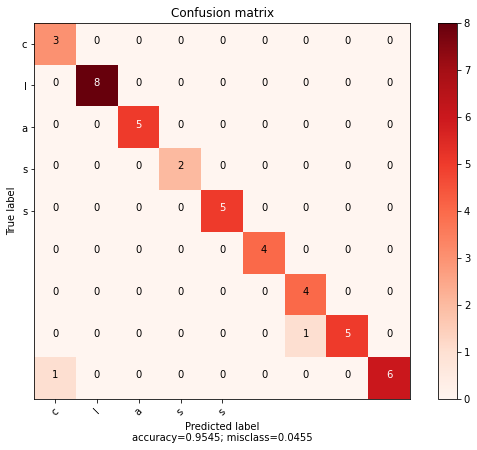

In [109]:

#from sklearn.metrics import confusion_matrix
cm = con_mat 


import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a  confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix(or tf.math.confusion_matrix)

    target_names: given classification classes such as [0, 1, 2, 3, 4, 5, 6]
                  the class names, for example: ['high', 'medium', 'low','MD']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('YlOrBr')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm,'class',title='Confusion matrix',cmap='Reds', normalize=False)
